### Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import table
import warnings
warnings.filterwarnings('ignore')

### Read the data

In [2]:
oil_prices_path = '../data/oil_prices/'
wti_path = '../data/wti/'
population_path = '../data/population/'
ppp_path = '../data/ppp/'

oil_prices_df = pd.read_csv(oil_prices_path + 'brent-year.csv')
wti_year_df = pd.read_csv(wti_path + 'wti-year.csv')
population_df = pd.read_csv(population_path + 'population_by_variant.csv')
ppp_df = pd.read_csv(ppp_path + 'ppp-gdp_by_variant.csv')

# Population for 1960 - 2018

### Line graph

In [3]:
# divide the dataset into countries
cyprus_population = population_df[population_df['Country Name'] == 'Cyprus']
equatorial_guinea_population = population_df[population_df['Country Name'] == 'Equatorial Guinea']
ethiopia_population = population_df[population_df['Country Name'] == 'Ethiopia']

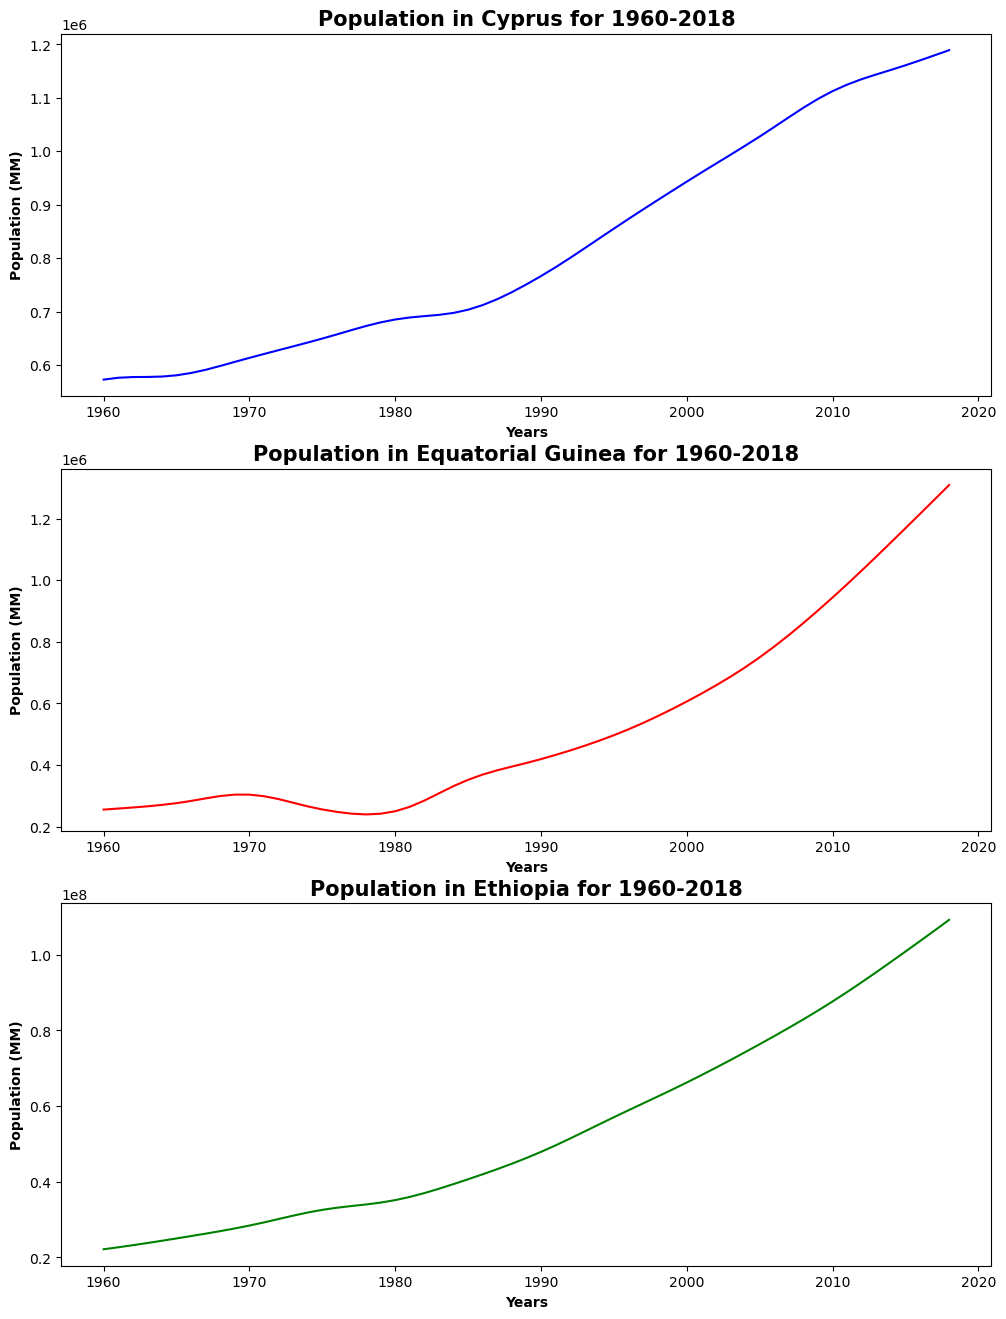

In [4]:
fig1, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12,16))

ax1.plot(cyprus_population['Year'], cyprus_population['Value'], c='b')
ax1.set_title('Population in Cyprus for 1960-2018', fontweight ='bold', fontsize = 15)
ax1.set_xlabel('Years', fontweight ='bold', fontsize = 10)
ax1.set_ylabel('Population (MM)', fontweight ='bold', fontsize = 10)

ax2.plot(equatorial_guinea_population['Year'], equatorial_guinea_population['Value'], c='r')
ax2.set_title('Population in Equatorial Guinea for 1960-2018', fontweight ='bold', fontsize = 15)
ax2.set_xlabel('Years', fontweight ='bold', fontsize = 10)
ax2.set_ylabel('Population (MM)', fontweight ='bold', fontsize = 10)

ax3.plot(ethiopia_population['Year'], ethiopia_population['Value'], c='g')
ax3.set_title('Population in Ethiopia for 1960-2018', fontweight ='bold', fontsize = 15)
ax3.set_xlabel('Years', fontweight ='bold', fontsize = 10)
ax3.set_ylabel('Population (MM)', fontweight ='bold', fontsize = 10)

plt.show()
fig1.savefig('../img/population_in_countries_line.png')

### Pie chart

For greater clarity, it was decided to cover the period from 2010 to 2018.

In [5]:
val8 = [int(i) for i in range(2010, 2019)]
cyprus_8_years = cyprus_population[cyprus_population['Year'].isin(val8)]
equatorial_guinea_8_years = equatorial_guinea_population[equatorial_guinea_population['Year'].isin(val8)]
ethiopia_8_years = ethiopia_population[ethiopia_population['Year'].isin(val8)]
mylabels = [str(i) for i in val8]

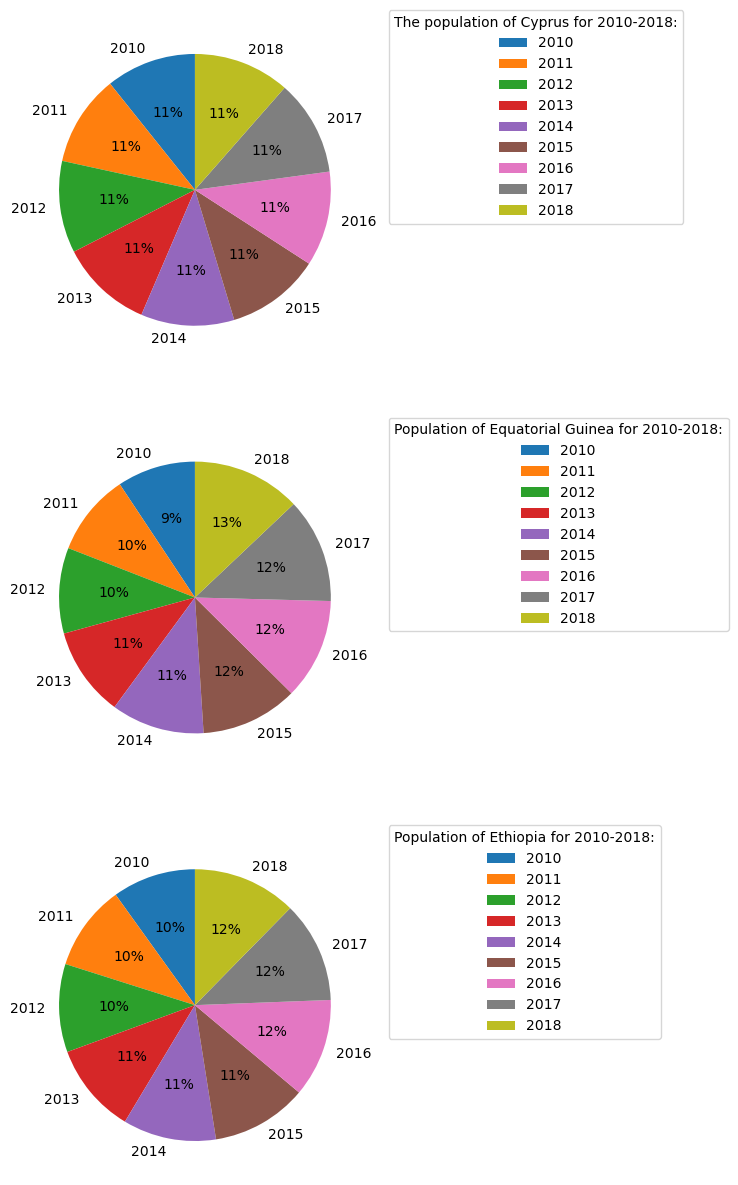

In [6]:
fig2, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(25,15))

ax1.pie(cyprus_8_years['Value'], labels=mylabels, startangle = 90, autopct='%1.0f%%')
ax1.legend(title = "The population of Cyprus for 2010-2018:", bbox_to_anchor=(1.05, 1.05))

ax2.pie(equatorial_guinea_8_years['Value'], labels=mylabels, startangle = 90, autopct='%1.0f%%')
ax2.legend(title = "Population of Equatorial Guinea for 2010-2018:", bbox_to_anchor=(1.05, 1.05))

ax3.pie(ethiopia_8_years['Value'], labels=mylabels, startangle = 90, autopct=f'%1.0f%%')
ax3.legend(title = "Population of Ethiopia for 2010-2018:", bbox_to_anchor=(1.05, 1.05))

plt.show()
fig2.savefig('../img/population_in_countries_pie.png')

### Bar graph

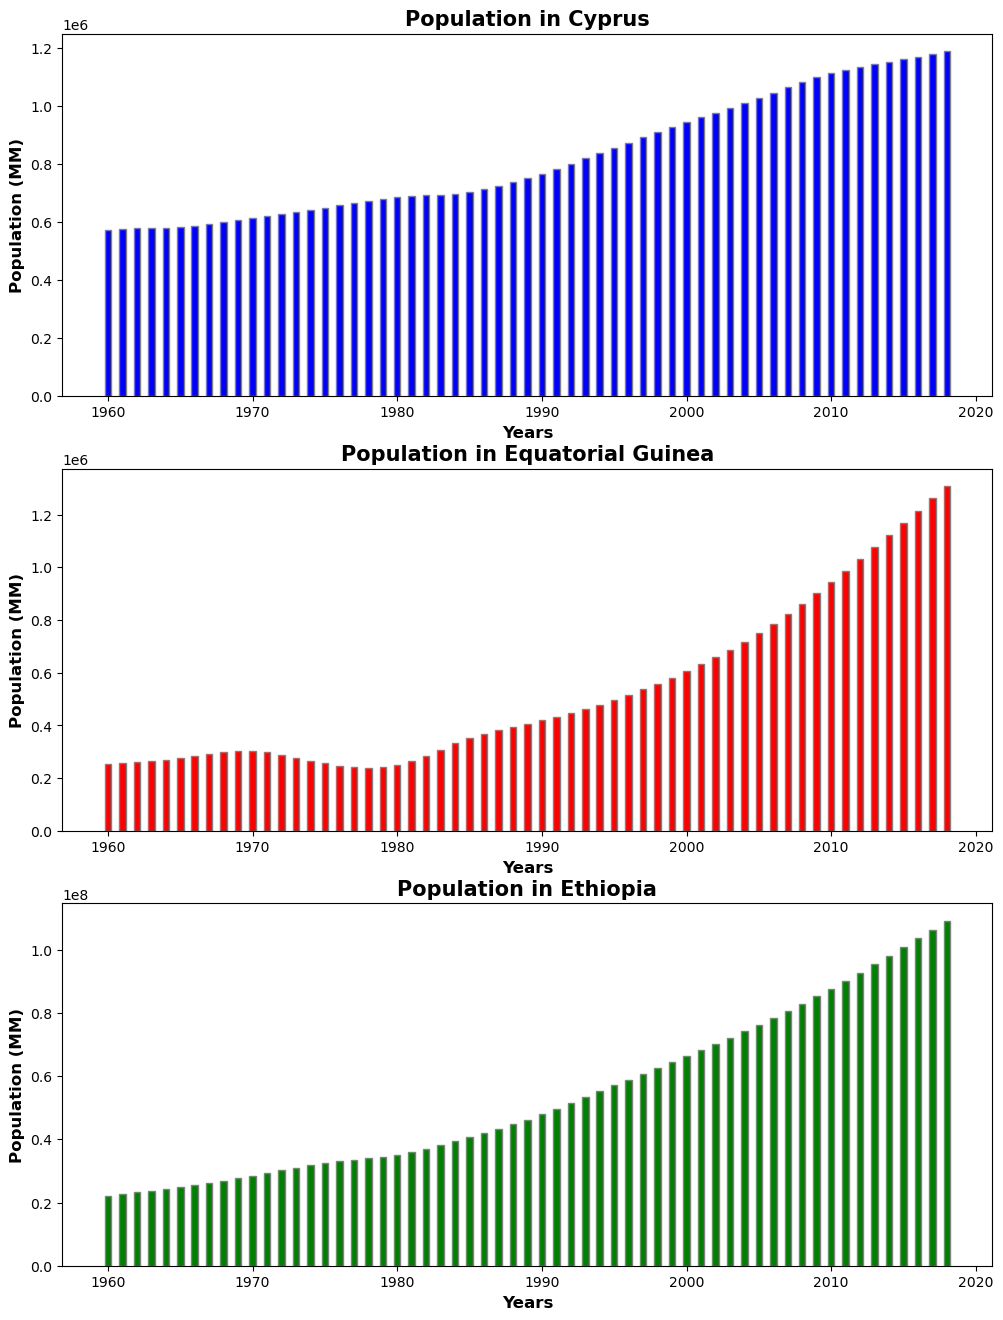

In [7]:
fig3, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12,16))
ax1.bar(cyprus_population['Year'], cyprus_population['Value'], color ='b', width = 0.45,
        edgecolor ='grey')
ax1.set_title('Population in Cyprus', fontweight ='bold', fontsize = 15)
ax1.set_xlabel('Years', fontweight ='bold', fontsize = 12)
ax1.set_ylabel('Population (MM)', fontweight ='bold', fontsize = 12)

ax2.bar(equatorial_guinea_population['Year'], equatorial_guinea_population['Value'], color ='r', width = 0.45,
        edgecolor ='grey')
ax2.set_title('Population in Equatorial Guinea', fontweight ='bold', fontsize = 15)
ax2.set_xlabel('Years', fontweight ='bold', fontsize = 12)
ax2.set_ylabel('Population (MM)', fontweight ='bold', fontsize = 12)

ax3.bar(ethiopia_population['Year'], ethiopia_population['Value'], color ='g', width = 0.45,
        edgecolor ='grey')
ax3.set_title('Population in Ethiopia', fontweight ='bold', fontsize = 15)
ax3.set_xlabel('Years', fontweight ='bold', fontsize = 12)
ax3.set_ylabel('Population (MM)', fontweight ='bold', fontsize = 12)

plt.show()
fig3.savefig('../img/population_in_countries_bar.png')

# The main statistical values of the population of the countries

### Cyprus:

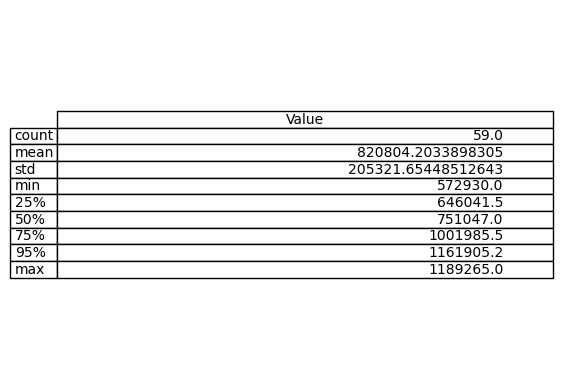

In [8]:
cyprus_population_describe = cyprus_population['Value'].describe(percentiles=[.25, .75, .95])

#create a subplot without frame
plot_1 = plt.subplot(111, frame_on=False)

#remove axis
plot_1.xaxis.set_visible(False) 
plot_1.yaxis.set_visible(False) 

#create the table plot and position it in the upper left corner
table(plot_1, cyprus_population_describe, loc='center right')

#save the plot as a png file
plt.savefig('../img/main_statistical_values_cyprus.png')

### Equatorial Guinea:

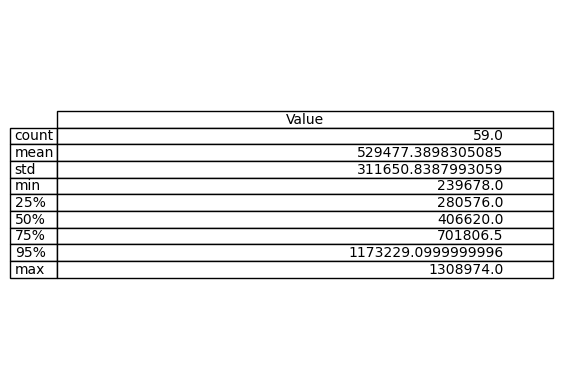

In [9]:
equatorial_guinea_describe = equatorial_guinea_population['Value'].describe(percentiles=[.25, .75, .95])

#create a subplot without frame
plot_2 = plt.subplot(111, frame_on=False)

#remove axis
plot_2.xaxis.set_visible(False) 
plot_2.yaxis.set_visible(False) 

#create the table plot and position it in the upper left corner
table(plot_2, equatorial_guinea_describe, loc='center right')

#save the plot as a png file
plt.savefig('../img/main_statistical_values_equatorial_guinea.png')

### Ethiopia:

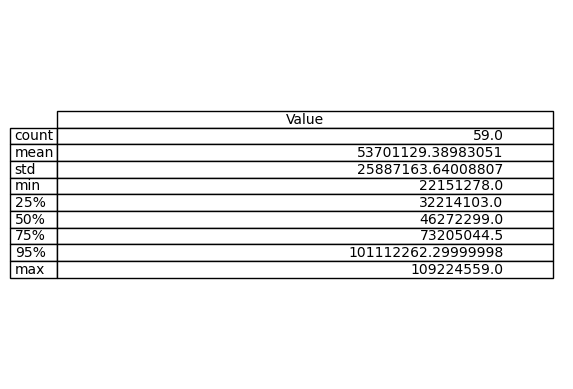

In [10]:
ethiopia_describe = ethiopia_population['Value'].describe(percentiles=[.25, .75, .95])

#create a subplot without frame
plot_3 = plt.subplot(111, frame_on=False)

#remove axis
plot_3.xaxis.set_visible(False) 
plot_3.yaxis.set_visible(False) 

#create the table plot and position it in the upper left corner
table(plot_3, ethiopia_describe, loc='center right')

#save the plot as a png file
plt.savefig('../img/main_statistical_values_ethiopia.png')

# The relationship between oil prices and purchasing power parity

In [11]:
# divide the dataset into countries
cyprus_ppp = ppp_df[ppp_df['Country'] == 'Cyprus']
equatorial_guinea_ppp = ppp_df[ppp_df['Country'] == 'Equatorial Guinea']
ethiopia_ppp = ppp_df[ppp_df['Country'] == 'Ethiopia']

In [12]:
# merging tables
oil_prices_df = oil_prices_df.rename(columns={"Date": "Year"})
cyprus_oil_prices_ppp = cyprus_ppp.merge(oil_prices_df, how='inner', on='Year')
equatorial_guinea_oil_prices_ppp = equatorial_guinea_ppp.merge(oil_prices_df, how='inner', on='Year')
ethiopia_oil_prices_ppp = ethiopia_ppp.merge(oil_prices_df, how='inner', on='Year')

### Cyprus

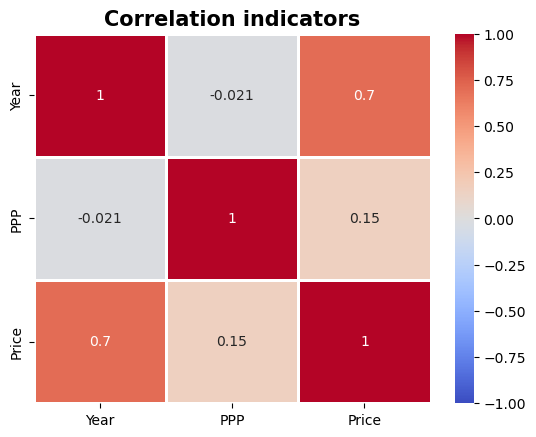

In [13]:
ax = plt.axes()
svm = sns.heatmap(cyprus_oil_prices_ppp.corr(), annot = True, vmin=-1, vmax=1, center= 0,
                  cmap= 'coolwarm', linewidths=1, linecolor='white')
ax.set_title('Correlation indicators', fontweight ='bold', fontsize = 15)

figure = svm.get_figure()    
figure.savefig('../img/heatmap_oil_ppp_cyprus.png', dpi=400)

Since the value of the correlation index between oil price and ppp is 0.15, it can be concluded that the relationship between these variables is very weak.

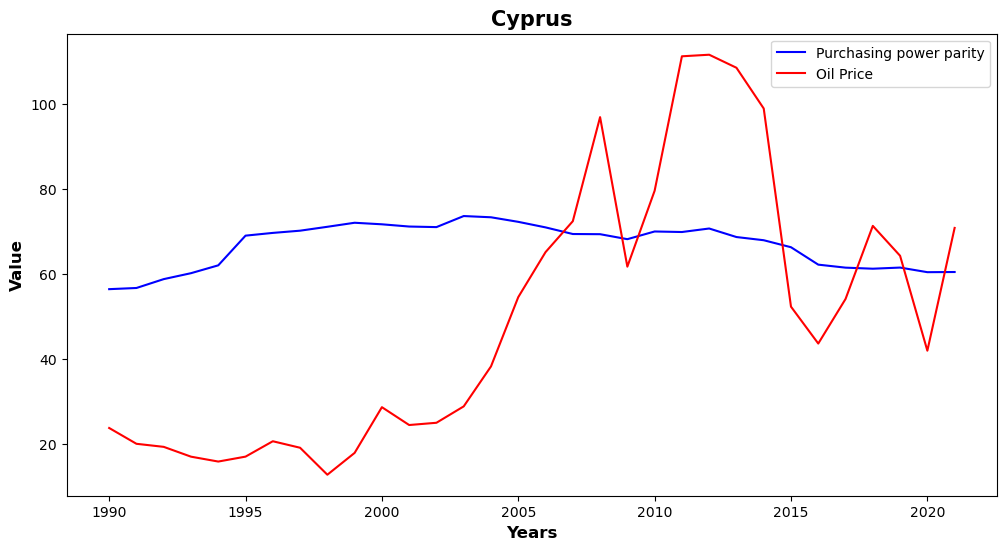

In [14]:
fig4 = plt.figure(figsize=(12,6))
plt.plot(cyprus_oil_prices_ppp['Year'], cyprus_oil_prices_ppp['PPP']*100, c='b', label='Purchasing power parity')
plt.plot(cyprus_oil_prices_ppp['Year'], cyprus_oil_prices_ppp['Price'], c='r', label='Oil Price')
plt.title('Cyprus', fontweight ='bold', fontsize = 15)
plt.xlabel('Years', fontweight ='bold', fontsize = 12)
plt.ylabel('Value', fontweight ='bold', fontsize = 12)
plt.legend()
plt.show()
fig4.savefig('../img/correlation_oil_and_ppp_cyprus.png')

### Equatorial Guinea

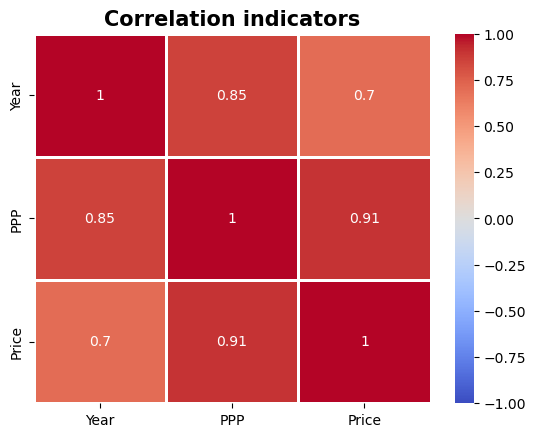

In [15]:
ax = plt.axes()
svm = sns.heatmap(equatorial_guinea_oil_prices_ppp.corr(), annot = True, vmin=-1, vmax=1, center= 0,
                  cmap= 'coolwarm', linewidths=1, linecolor='white')
ax.set_title('Correlation indicators', fontweight ='bold', fontsize = 15)

figure = svm.get_figure()    
figure.savefig('../img/heatmap_oil_ppp_guinea.png', dpi=400)

Since the value of the correlation index between oil price and ppp is 0.91, it can be concluded that the relationship between these variables is very strong.

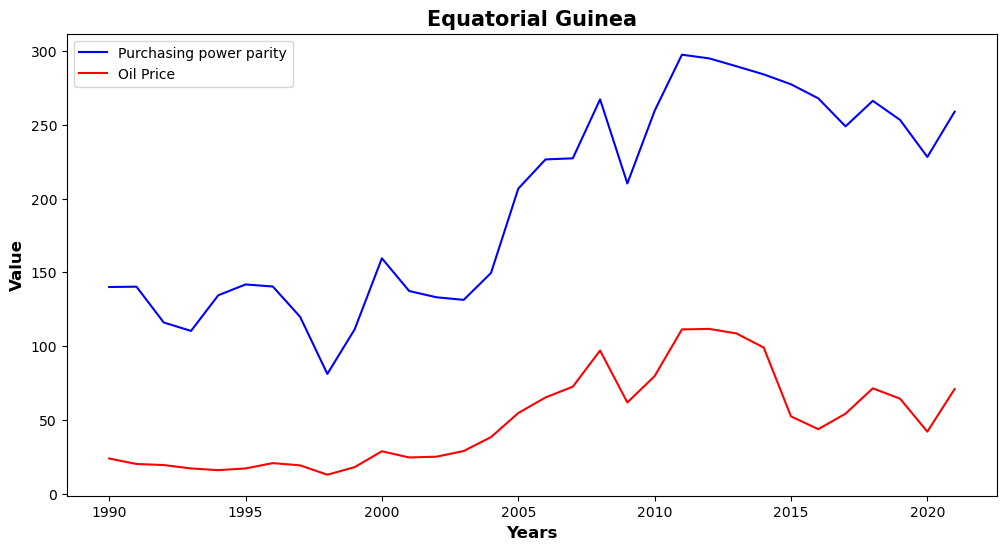

In [16]:
fig5 = plt.figure(figsize=(12,6))
plt.plot(equatorial_guinea_oil_prices_ppp['Year'], equatorial_guinea_oil_prices_ppp['PPP'], c='b', label='Purchasing power parity')
plt.plot(equatorial_guinea_oil_prices_ppp['Year'], equatorial_guinea_oil_prices_ppp['Price'], c='r', label='Oil Price')
plt.title('Equatorial Guinea', fontweight ='bold', fontsize = 15)
plt.xlabel('Years', fontweight ='bold', fontsize = 12)
plt.ylabel('Value', fontweight ='bold', fontsize = 12)
plt.legend()
plt.show()
fig5.savefig('../img/correlation_oil_and_ppp_guinea.png')

### Ethiopia

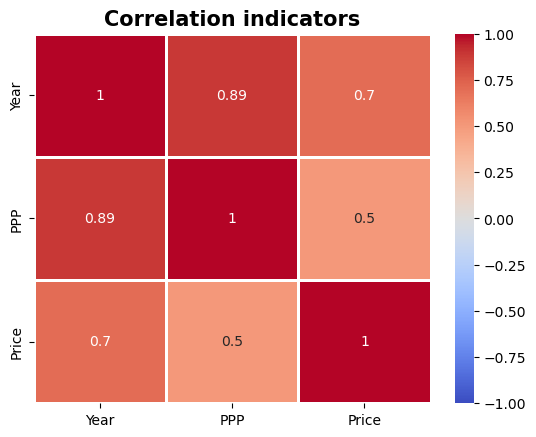

In [17]:
ax = plt.axes()
svm = sns.heatmap(ethiopia_oil_prices_ppp.corr(), annot = True, vmin=-1, vmax=1, center= 0,
                  cmap= 'coolwarm', linewidths=1, linecolor='white')
ax.set_title('Correlation indicators', fontweight ='bold', fontsize = 15)

figure = svm.get_figure()    
figure.savefig('../img/heatmap_oil_ppp_ethiopia.png', dpi=400)

Since the value of the correlation index between oil price and ppp is 0.5, it can be concluded that the relationship between these variables is moderate.

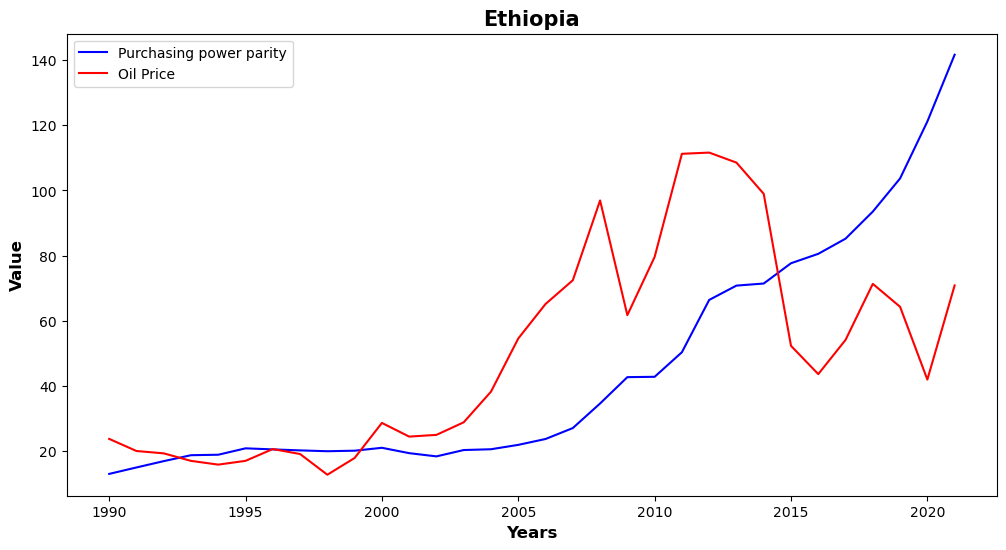

In [18]:
fig6 = plt.figure(figsize=(12,6))
plt.plot(ethiopia_oil_prices_ppp['Year'], ethiopia_oil_prices_ppp['PPP']*10, c='b', label='Purchasing power parity')
plt.plot(ethiopia_oil_prices_ppp['Year'], ethiopia_oil_prices_ppp['Price'], c='r', label='Oil Price')
plt.title('Ethiopia', fontweight ='bold', fontsize = 15)
plt.xlabel('Years', fontweight ='bold', fontsize = 12)
plt.ylabel('Value', fontweight ='bold', fontsize = 12)
plt.legend()
plt.show()
fig6.savefig('../img/correlation_oil_and_ppp_ethiopia.png')

Due to the lack of data, the graph shows the relationship between oil prices and purchasing power parity for the period from 1990 to 2021.

# The relationship between population and purchasing power parity

In [19]:
# merging tables
cyprus_population_ppp = cyprus_population.merge(cyprus_ppp, how='inner', on='Year')
equatorial_guinea_population_ppp = equatorial_guinea_population.merge(equatorial_guinea_ppp, 
                                                                      how='inner', on='Year')
ethiopia_population_ppp = ethiopia_population.merge(ethiopia_ppp, how='inner', on='Year')

### Cyprus

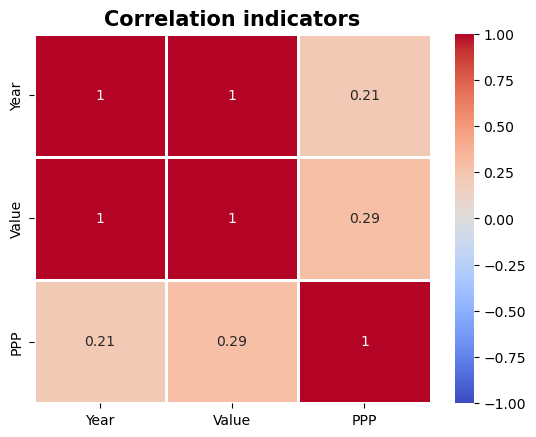

In [20]:
ax = plt.axes()
svm = sns.heatmap(cyprus_population_ppp.corr(), annot = True, vmin=-1, vmax=1, center= 0,
                  cmap= 'coolwarm', linewidths=1, linecolor='white')
ax.set_title('Correlation indicators', fontweight ='bold', fontsize = 15)

figure = svm.get_figure()    
figure.savefig('../img/heatmap_population_ppp_cyprus.png', dpi=400)

Since the value of the correlation index between population and ppp is 0.29, it can be concluded that the relationship between these variables is very weak.

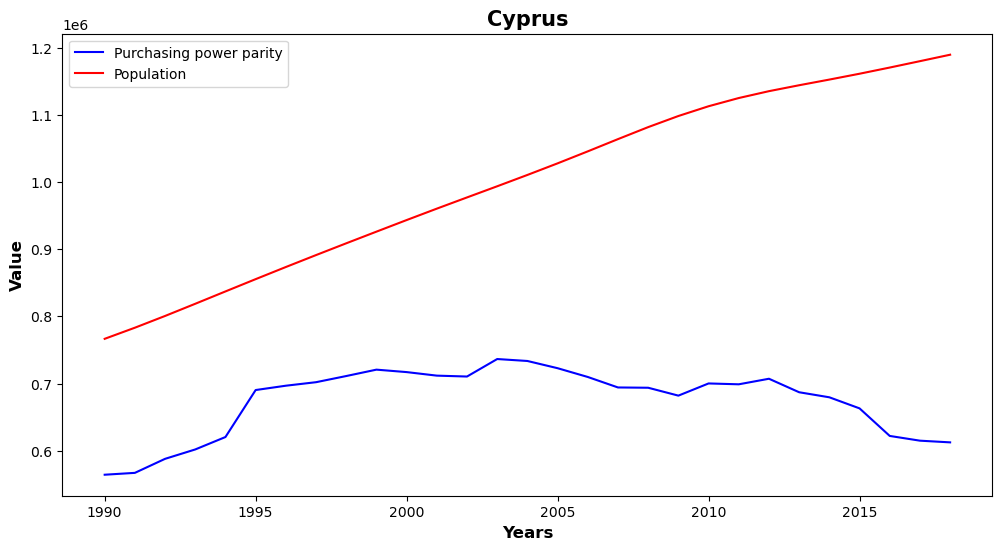

In [21]:
fig7 = plt.figure(figsize=(12,6))
plt.plot(cyprus_population_ppp['Year'], cyprus_population_ppp['PPP']*1000000, c='b', label='Purchasing power parity')
plt.plot(cyprus_population_ppp['Year'], cyprus_population_ppp['Value'], c='r', label='Population')
plt.title('Cyprus', fontweight ='bold', fontsize = 15)
plt.xlabel('Years', fontweight ='bold', fontsize = 12)
plt.ylabel('Value', fontweight ='bold', fontsize = 12)
plt.legend()
plt.show()
fig7.savefig('../img/correlation_population_and_ppp_cyprus.png')

### Equatorial Guinea

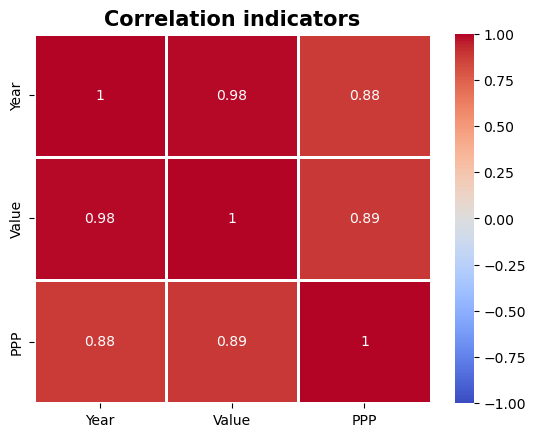

In [22]:
ax = plt.axes()
svm = sns.heatmap(equatorial_guinea_population_ppp.corr(), annot = True, vmin=-1, vmax=1, center= 0,
                  cmap= 'coolwarm', linewidths=1, linecolor='white')
ax.set_title('Correlation indicators', fontweight ='bold', fontsize = 15)

figure = svm.get_figure()    
figure.savefig('../img/heatmap_population_ppp_guinea.png', dpi=400)

Since the value of the correlation index between population and ppp is 0.89, it can be concluded that the relationship between these variables is very strong.

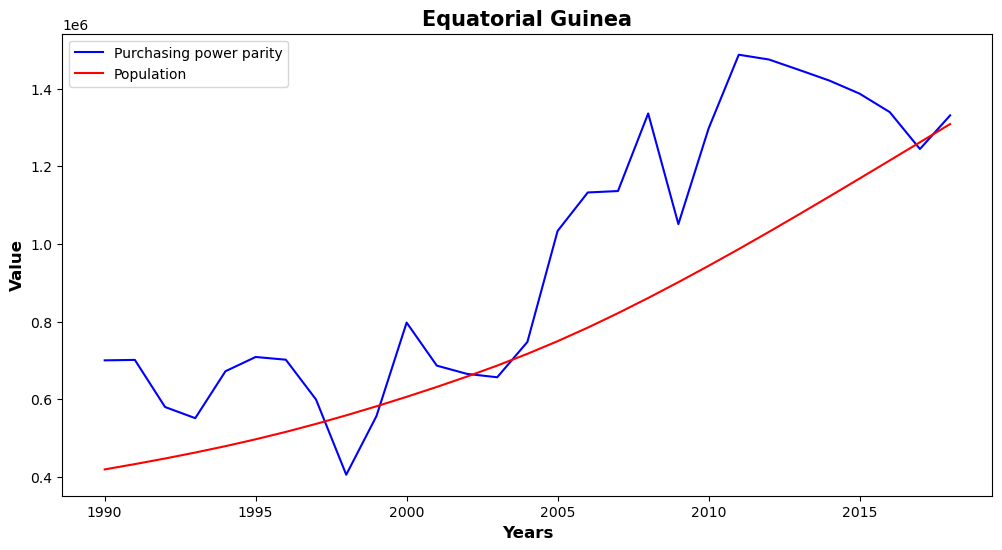

In [23]:
fig8 = plt.figure(figsize=(12,6))
plt.plot(equatorial_guinea_population_ppp['Year'], equatorial_guinea_population_ppp['PPP']*5000, c='b',
         label='Purchasing power parity')
plt.plot(equatorial_guinea_population_ppp['Year'], equatorial_guinea_population_ppp['Value'], c='r',
         label='Population')
plt.title('Equatorial Guinea', fontweight ='bold', fontsize = 15)
plt.xlabel('Years', fontweight ='bold', fontsize = 12)
plt.ylabel('Value', fontweight ='bold', fontsize = 12)
plt.legend()
plt.show()
fig8.savefig('../img/correlation_population_and_ppp_guinea.png')

### Ethiopia

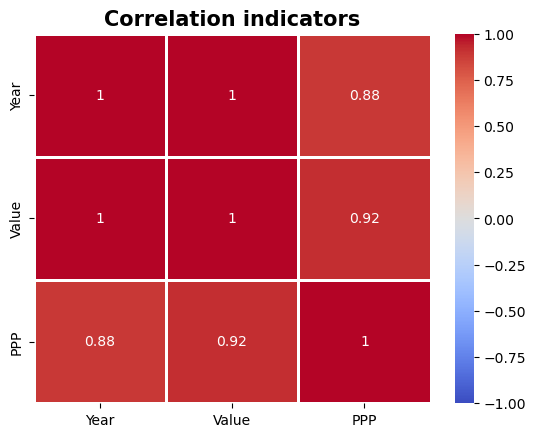

In [24]:
ax = plt.axes()
svm = sns.heatmap(ethiopia_population_ppp.corr(), annot = True, vmin=-1, vmax=1, center= 0,
            cmap= 'coolwarm', linewidths=1, linecolor='white')
ax.set_title('Correlation indicators', fontweight ='bold', fontsize = 15)

figure = svm.get_figure()    
figure.savefig('../img/heatmap_population_ppp_ethiopia.png', dpi=400)

Since the value of the correlation index between population and ppp is 0.92, it can be concluded that the relationship between these variables is very strong.

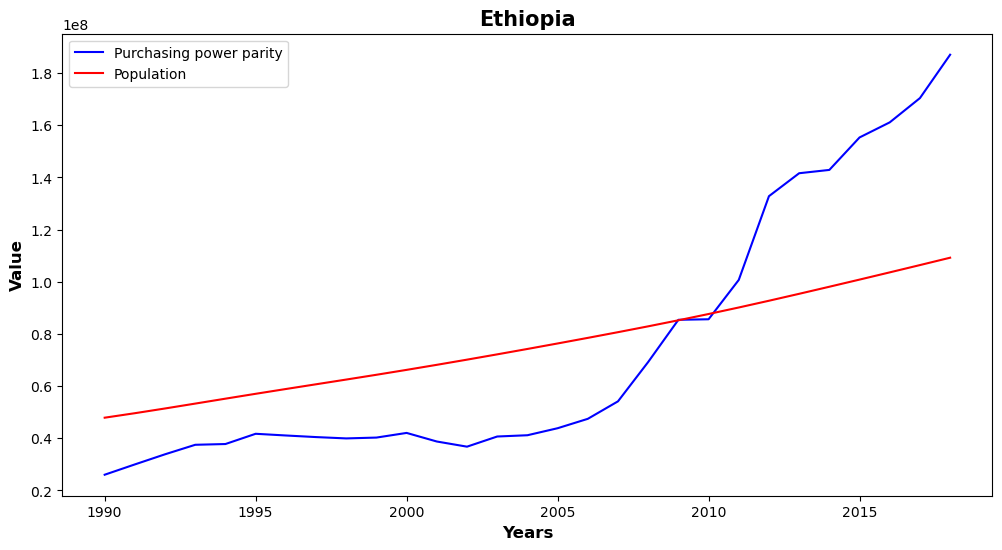

In [25]:
fig9 = plt.figure(figsize=(12,6))
plt.plot(ethiopia_population_ppp['Year'], ethiopia_population_ppp['PPP']*20000000, c='b',
         label='Purchasing power parity')
plt.plot(ethiopia_population_ppp['Year'], ethiopia_population_ppp['Value'], c='r',
         label='Population')
plt.title('Ethiopia', fontweight ='bold', fontsize = 15)
plt.xlabel('Years', fontweight ='bold', fontsize = 12)
plt.ylabel('Value', fontweight ='bold', fontsize = 12)
plt.legend()
plt.show()
fig9.savefig('../img/correlation_population_and_ppp_ethiopia.png')

# The relationship between population and the price of oil

In [26]:
# merging tables
cyprus_population_oil_prices = cyprus_population.merge(oil_prices_df, how='inner', on='Year')
equatorial_guinea_population_oil_prices = equatorial_guinea_population.merge(oil_prices_df, how='inner', on='Year')
ethiopia_population_oil_prices = ethiopia_population.merge(oil_prices_df, how='inner', on='Year')

### Cyprus

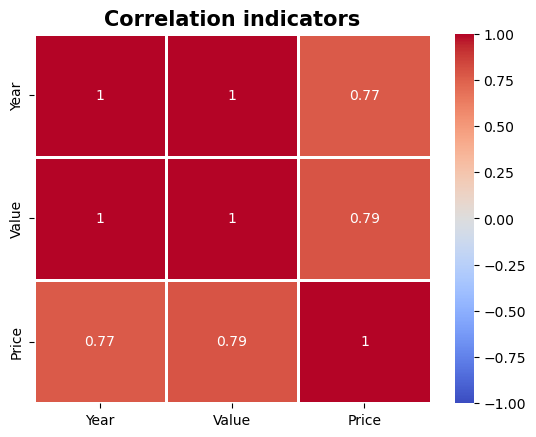

In [27]:
ax = plt.axes()
svm = sns.heatmap(cyprus_population_oil_prices.corr(), annot = True, vmin=-1, vmax=1, center= 0,
            cmap= 'coolwarm', linewidths=1, linecolor='white')
ax.set_title('Correlation indicators', fontweight ='bold', fontsize = 15)

figure = svm.get_figure()    
figure.savefig('../img/heatmap_population_oil_cyprus.png', dpi=400)

Since the value of the correlation index between population and ppp is 0.79, it can be concluded that the relationship between these variables is significant.

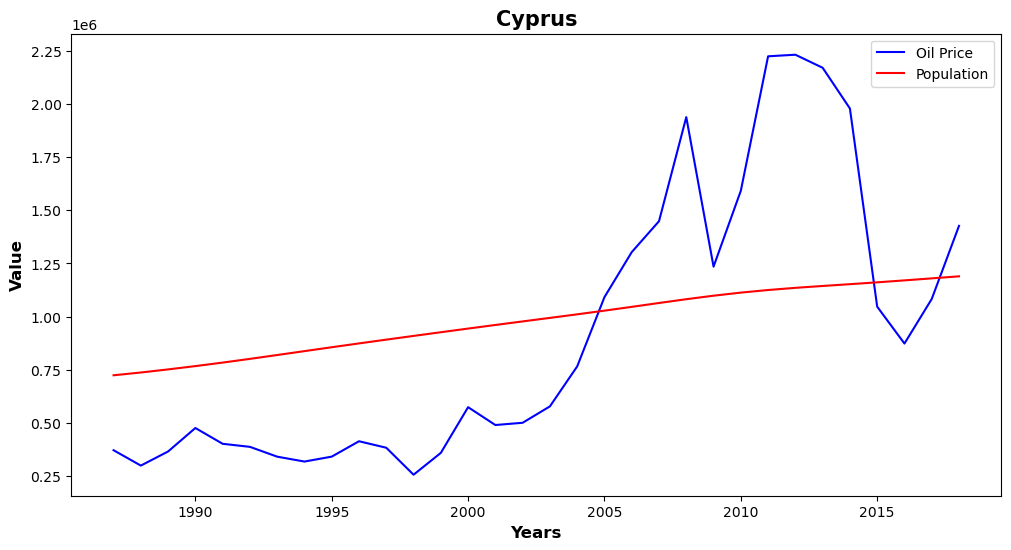

In [28]:
fig10 = plt.figure(figsize=(12,6))
plt.plot(cyprus_population_oil_prices['Year'], cyprus_population_oil_prices['Price']*20000, c='b',
         label='Oil Price')
plt.plot(cyprus_population_oil_prices['Year'], cyprus_population_oil_prices['Value'], c='r',
         label='Population')
plt.title('Cyprus', fontweight ='bold', fontsize = 15)
plt.xlabel('Years', fontweight ='bold', fontsize = 12)
plt.ylabel('Value', fontweight ='bold', fontsize = 12)
plt.legend()
plt.show()
fig10.savefig('../img/correlation_population_and_oil_cyprus.png')

### Equatorial Guinea

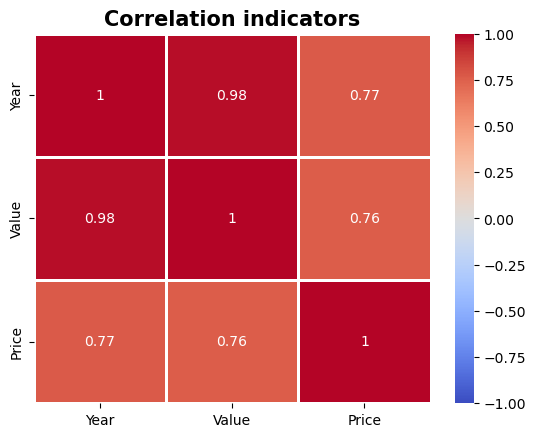

In [29]:
ax = plt.axes()
svm = sns.heatmap(equatorial_guinea_population_oil_prices.corr(), annot = True, vmin=-1, vmax=1, center= 0,
            cmap= 'coolwarm', linewidths=1, linecolor='white')
ax.set_title('Correlation indicators', fontweight ='bold', fontsize = 15)

figure = svm.get_figure()    
figure.savefig('../img/heatmap_population_oil_guinea.png', dpi=400)

Since the value of the correlation index between population and ppp is 0.76, it can be concluded that the relationship between these variables is significant.

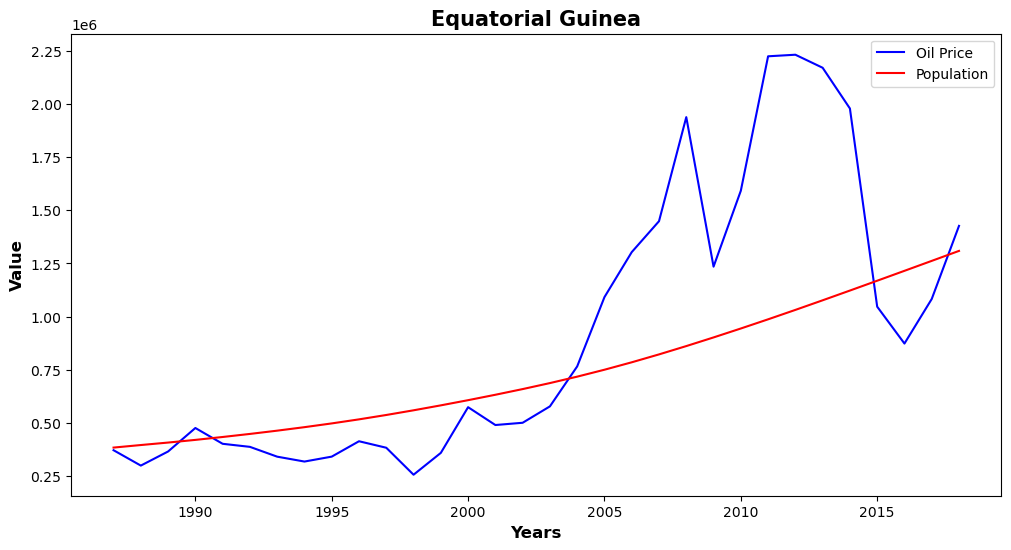

In [30]:
fig11 = plt.figure(figsize=(12,6))
plt.plot(equatorial_guinea_population_oil_prices['Year'], equatorial_guinea_population_oil_prices['Price']*20000,
         c='b', label='Oil Price')
plt.plot(equatorial_guinea_population_oil_prices['Year'], equatorial_guinea_population_oil_prices['Value'],
         c='r', label='Population')
plt.title('Equatorial Guinea', fontweight ='bold', fontsize = 15)
plt.xlabel('Years', fontweight ='bold', fontsize = 12)
plt.ylabel('Value', fontweight ='bold', fontsize = 12)
plt.legend()
plt.show()
fig11.savefig('../img/correlation_population_and_oil_guinea.png')

### Ethiopia

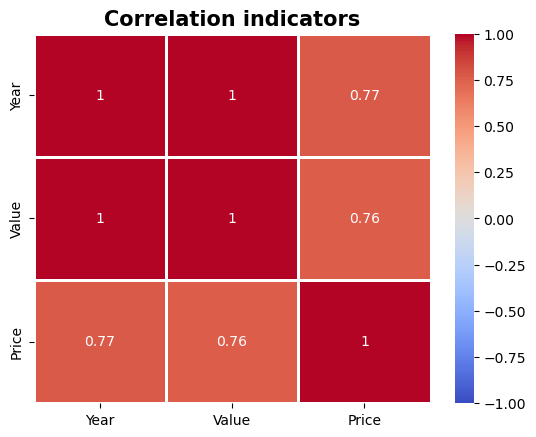

In [31]:
ax = plt.axes()
svm = sns.heatmap(ethiopia_population_oil_prices.corr(), annot = True, vmin=-1, vmax=1, center= 0,
            cmap= 'coolwarm', linewidths=1, linecolor='white')
ax.set_title('Correlation indicators', fontweight ='bold', fontsize = 15)

figure = svm.get_figure()    
figure.savefig('../img/heatmap_population_oil_ethiopia.png', dpi=400)

Since the value of the correlation index between population and ppp is 0.76, it can be concluded that the relationship between these variables is significant.

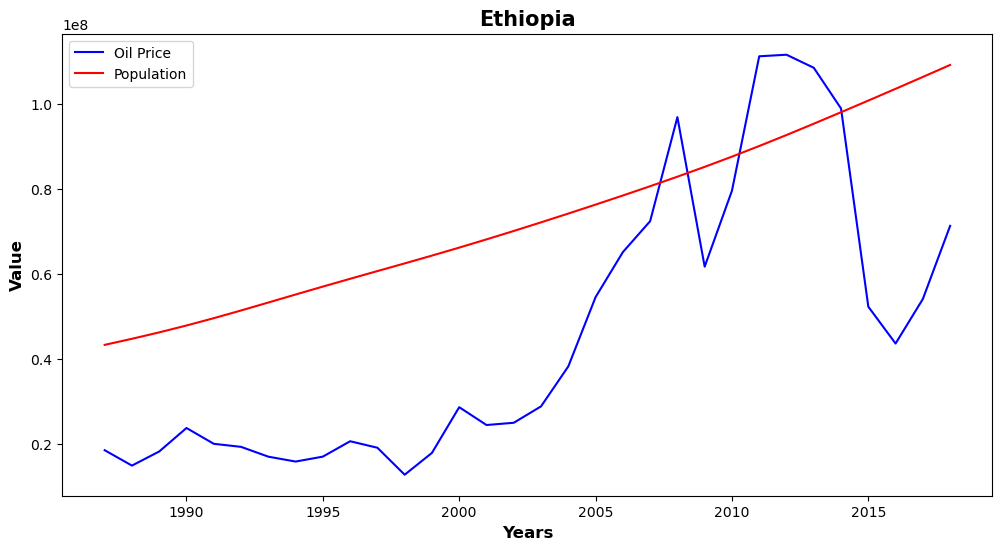

In [32]:
fig12 = plt.figure(figsize=(12,6))
plt.plot(ethiopia_population_oil_prices['Year'], ethiopia_population_oil_prices['Price']*1000000,
         c='b', label='Oil Price')
plt.plot(ethiopia_population_oil_prices['Year'], ethiopia_population_oil_prices['Value'],
         c='r', label='Population')
plt.title('Ethiopia', fontweight ='bold', fontsize = 15)
plt.xlabel('Years', fontweight ='bold', fontsize = 12)
plt.ylabel('Value', fontweight ='bold', fontsize = 12)
plt.legend()
plt.show()
fig12.savefig('../img/correlation_population_and_oil_ethiopia.png')

# The percentage of purchasing power parity of an individual country to the average purchasing power parity of all countries

In [33]:
all_countries_ppp = pd.read_csv(ppp_path + 'ppp-gdp.csv')
al = all_countries_ppp.groupby("Year", group_keys=False).mean('PPP')

In [34]:
# Cyprus
cyprus_plot = cyprus_ppp
cyprus_plot = cyprus_plot.sort_values(by=['Year'])
cyprus_plot = cyprus_plot.groupby('Year').mean()
cyprus_plot['mean'] = cyprus_plot['PPP'] * 100 / al['PPP']

# Equatorial Guinea
equatorial_guinea_plot = equatorial_guinea_ppp
equatorial_guinea_plot = equatorial_guinea_plot.sort_values(by=['Year'])
equatorial_guinea_plot = equatorial_guinea_plot.groupby('Year').mean()
equatorial_guinea_plot['mean'] = equatorial_guinea_plot['PPP'] * 100 / al['PPP']

# Ethiopia
ethiopia_plot = ethiopia_ppp
ethiopia_plot = ethiopia_plot.sort_values(by=['Year'])
ethiopia_plot = ethiopia_plot.groupby('Year').mean()
ethiopia_plot['mean'] = ethiopia_plot['PPP'] * 100 / al['PPP']

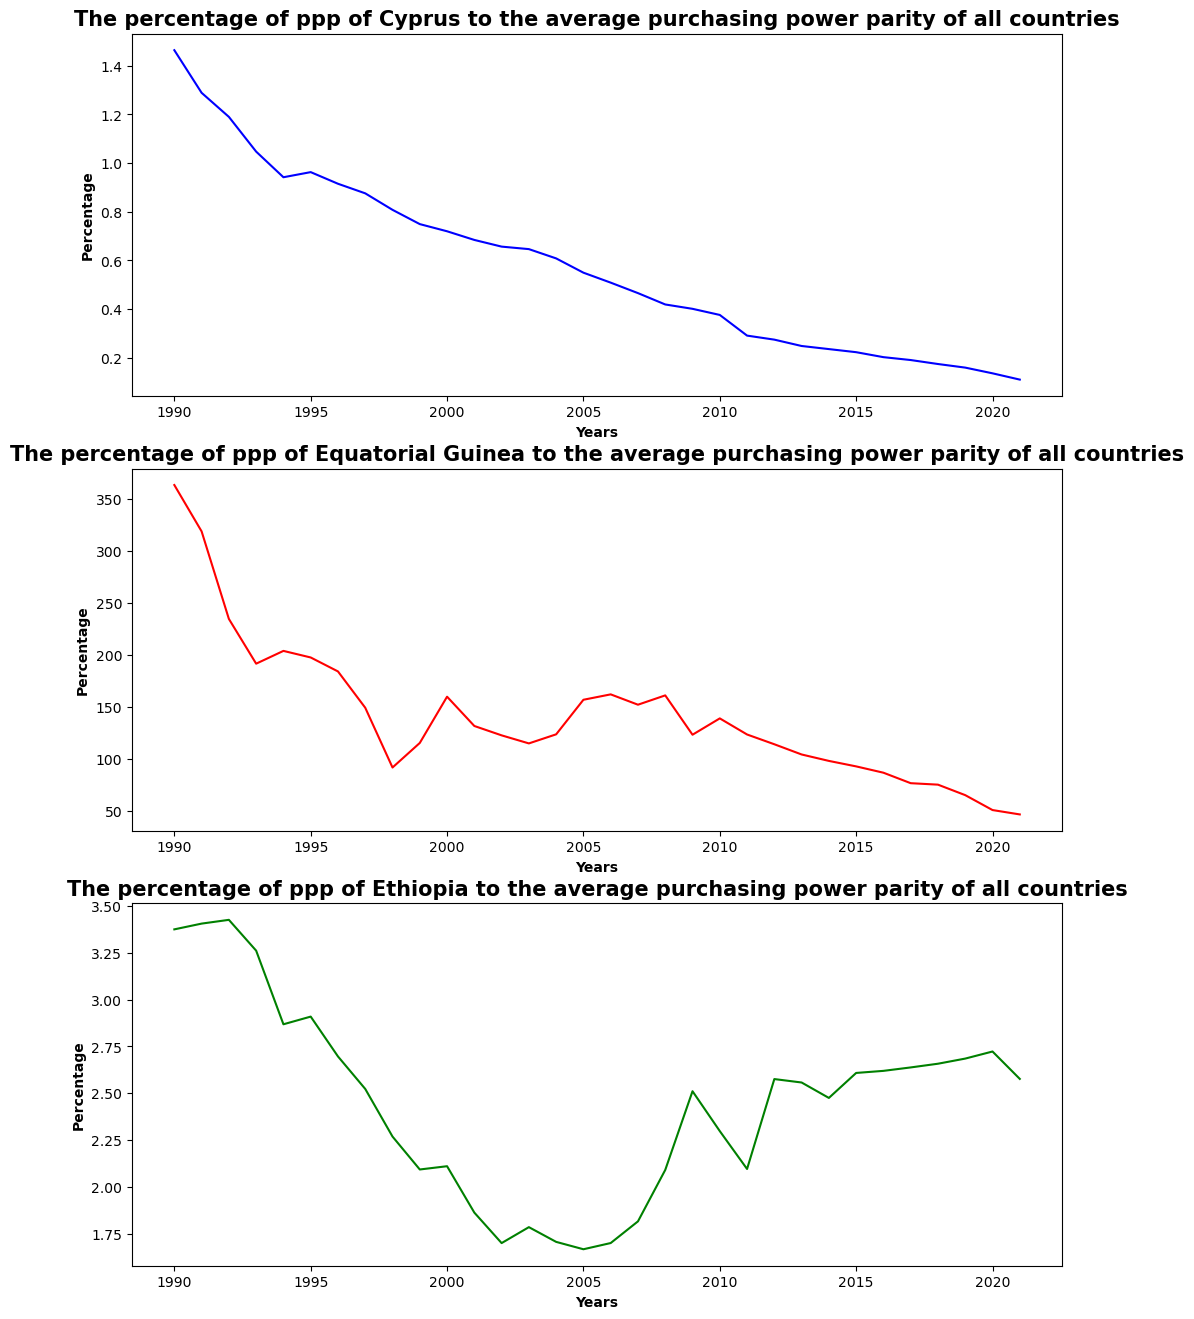

In [35]:
fig13, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12,16))

ax1.plot(cyprus_plot.index.values, cyprus_plot['mean'], c='b')
ax1.set_title('The percentage of ppp of Cyprus to the average purchasing power parity of all countries',
              fontweight ='bold', fontsize = 15)
ax1.set_xlabel('Years', fontweight ='bold', fontsize = 10)
ax1.set_ylabel('Percentage', fontweight ='bold', fontsize = 10)

ax2.plot(equatorial_guinea_plot.index.values, equatorial_guinea_plot['mean'], c='r')
ax2.set_title('The percentage of ppp of Equatorial Guinea to the average purchasing power parity of all countries',
              fontweight ='bold', fontsize = 15)
ax2.set_xlabel('Years', fontweight ='bold', fontsize = 10)
ax2.set_ylabel('Percentage', fontweight ='bold', fontsize = 10)

ax3.plot(ethiopia_plot.index.values, ethiopia_plot['mean'], c='g')
ax3.set_title('The percentage of ppp of Ethiopia to the average purchasing power parity of all countries',
              fontweight ='bold', fontsize = 15)
ax3.set_xlabel('Years', fontweight ='bold', fontsize = 10)
ax3.set_ylabel('Percentage', fontweight ='bold', fontsize = 10)

plt.show()
fig13.savefig('../img/percentage_ppp.png')